# IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
#데이터 가져오기
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#50000개의 sample, 각각 32*32의 해상도, 색깔 BGR
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
#50000개의 sample에 대한 label
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# VISUALIZE DATA

[4]


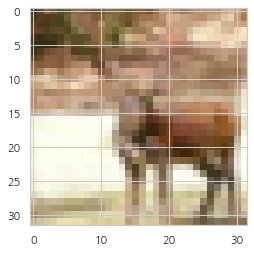

In [7]:
i = 1001
plt.imshow(X_train[i])
print(y_train[i])
#4이므로 Deer를 의미한다.

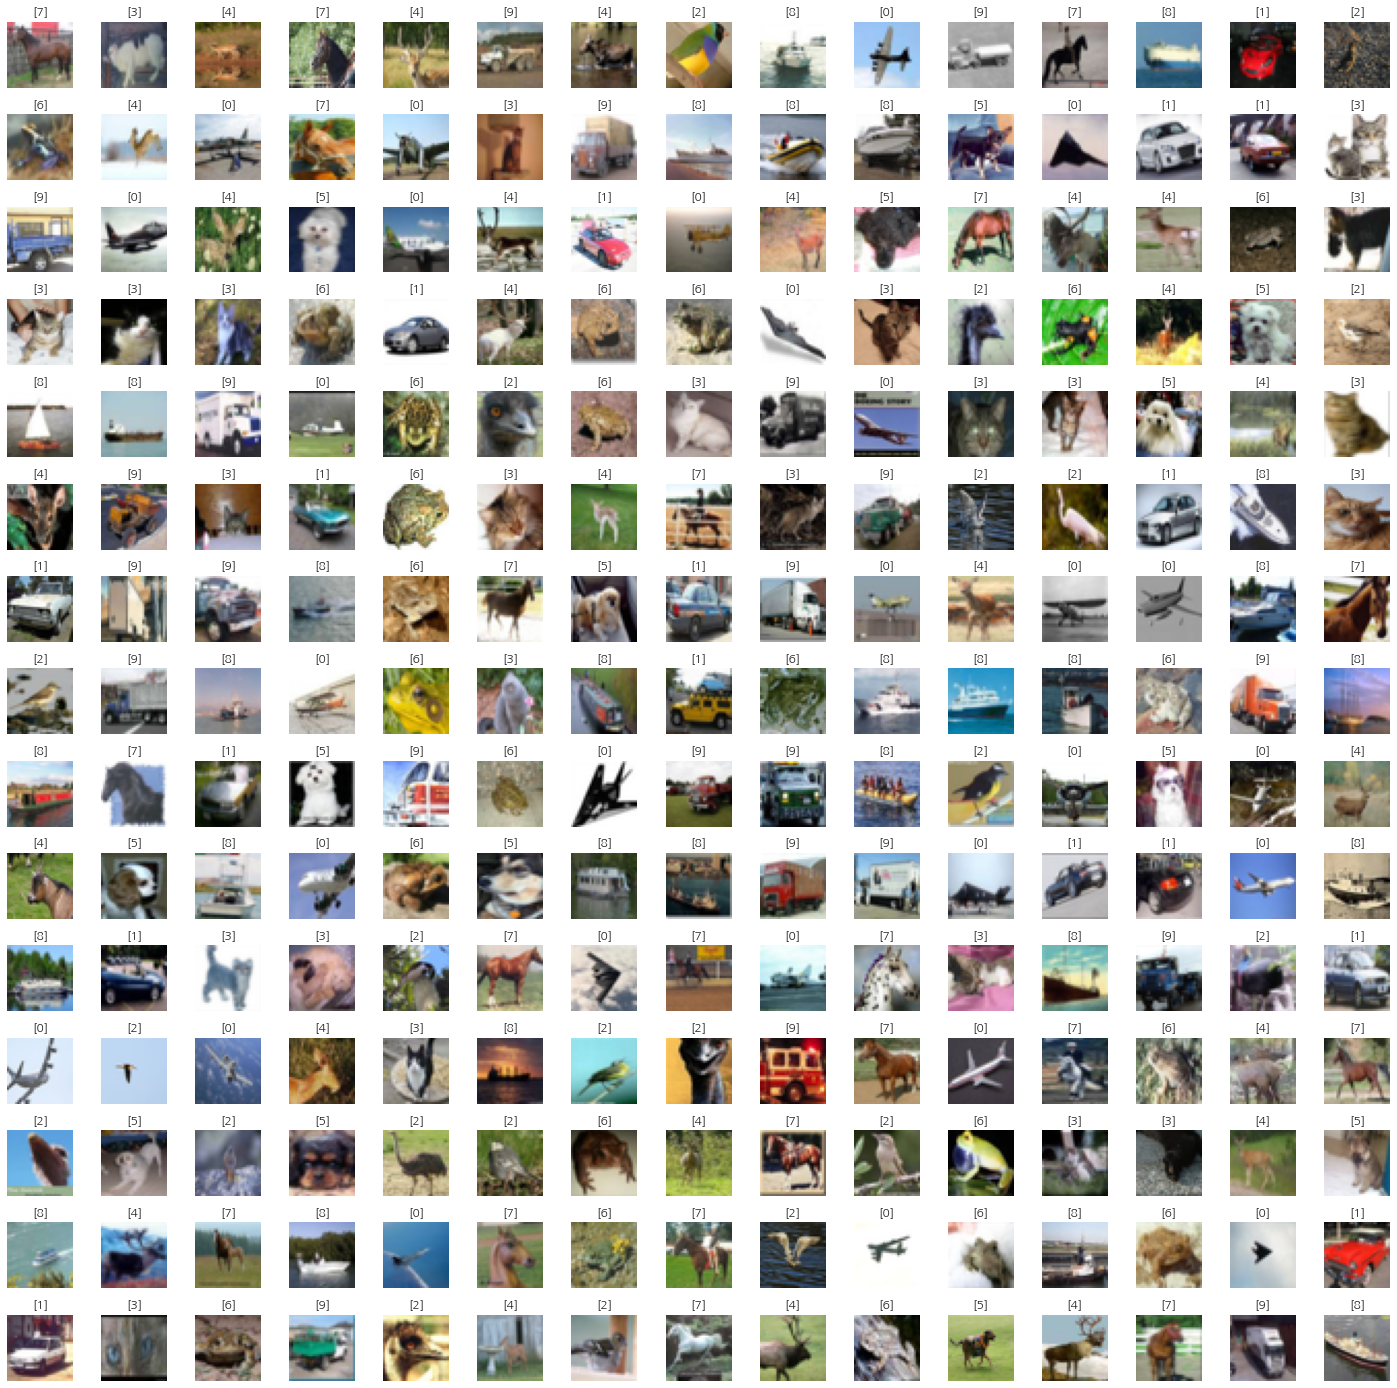

In [8]:
#L은 높이, W는 너비
W_grid = 15
L_grid = 15

#여러 개의 그래프
# 15row, 15cols, 25*25사이즈
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
#배열을 평평하게 펴줌 (15* 15는 225로)
axes = axes.ravel()

n_training = len(X_train)

#각 사진이 하나의 plot
#axes를 15*15에서 1*225로 펼쳤으니 그냥 0-224까지 넣으면 된다,
for i in np.arange(0, L_grid*W_grid):
    #0~49999까지 random
    index = np.random.randint(0, n_training)
    
    #i번째 axes에 사진 배정
    axes[i].imshow(X_train[index])
    
    #title을 label로 설정
    axes[i].set_title(y_train[index])
    
    #그래프에서 축 제거
    axes[i].axis('off')
    
#사진 간의 간격 조정
plt.subplots_adjust(hspace = 0.4)

In [9]:
n_training

50000

# DATA REPRESENTATION

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
#10개의 카테고리
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
#네트워크에서 10개의 출력을 낼 것이므로 
#각각 0또는 1분류
#1을 000000001, 2를 000000010로 설정
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, number_cat) #10

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test, number_cat) #10

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [18]:
#X_train을 정규화할 것이다.
X_train  =X_train/255
X_test = X_test/255

In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
Input_shape = X_train.shape[1:]

In [22]:
Input_shape

(32, 32, 3)

# TRAIN THE MODEL

In [23]:
from keras.models import Sequential
                        #convolution    #pooling                         #flatten #dropout
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()
#Convolution layer
                    #filter 32개,   kernel사이즈는 3*3(원하는 대로 선택)               (32,32,3)(첫 layer에만지정)
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

#pooling layer
#2*2 size로 downscale
cnn_model.add(MaxPooling2D(2,2))

#dropout로 뉴런을 줄여 overfitting방지
#0.3 즉, 30% 컷
cnn_model.add(Dropout(0.4))


#층 깊이 늘리기
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


#flatten작업
cnn_model.add(Flatten())

#본격적 네트워크 구성
#input_dim은 이전 층에 의해 알아서 정해짐
cnn_model.add(Dense(units = 1024, activation = 'relu'))

#another hiddenlayer
cnn_model.add(Dense(units = 1024, activation = 'relu'))

#출력층
#하나의 label당 총 10길이이므로 units를 10으로 지정해준다.
#출력이 0또는 1이어야하므로 softmax사용(분류), relu는 연속적인 출력 생성(회귀)
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [25]:
#출력값이 [0,1,0,0,0]처럼 one hot encoding으로 나오면 categorical_crossentropy(다중 분류 손실함수)를 사용
#RMSprop로 학습률 설정
#metrics는 평가지표이다. 분류는 accuracy, 회귀는 mse,rmse등등
cnn_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr=0.001), metrics = ['accuracy'])

In [26]:
#네트워크가 다른 순서의 이미지에 노출되게끔 shuffle 사용
#
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 174s 104ms/step - loss: 1.9063 - accuracy: 0.3128
Epoch 2/2
1563/1563 [==============================] - 167s 107ms/step - loss: 1.2552 - accuracy: 0.5666


#  EVALUATE THE MODEL

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {}'.format(evaluation[1]))
#10000/32 = 313
#epoch가 커지면 정확도는 늘어날것

313/313 [==============================] - 7s 21ms/step - loss: 1.1198 - accuracy: 0.6390
Test Accuracy : 0.6389999985694885


In [29]:
#X_test의 값들에 대한 label을 예측해봄
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [30]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [31]:
#y_test에서 배열 내 가장 큰 값(1)의 위치를 반환, 즉 원래의 데이터로 돌아갈 수 있다.
y_test = y_test.argmax(1)

In [32]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

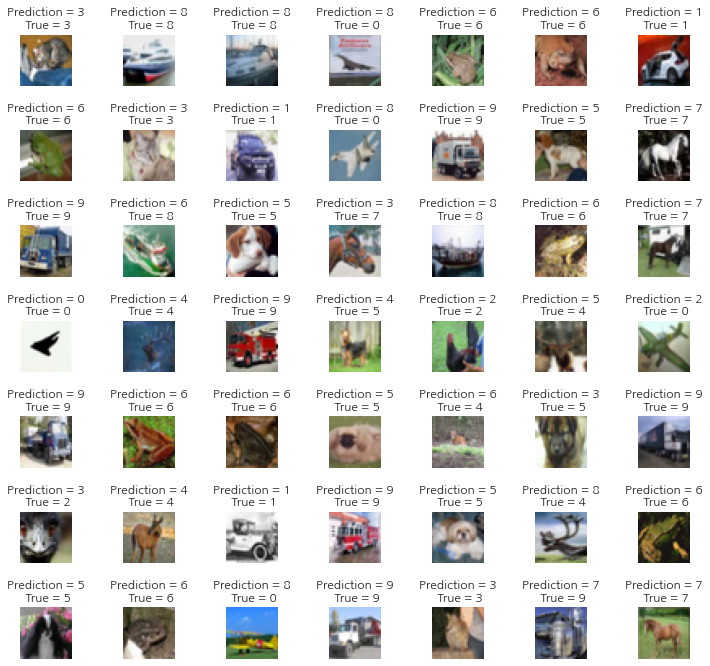

In [34]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
#너비공간 조정
plt.subplots_adjust(wspace = 1)

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm

array([[473,  25,  56,  78,  30,   6,  13,  18, 241,  60],
       [  5, 822,   3,  13,   2,   5,   7,   5,  46,  92],
       [ 62,  10, 427, 149,  69,  87, 117,  39,  28,  12],
       [ 10,   9,  30, 552,  29, 179,  84,  45,  31,  31],
       [ 12,  13,  66, 161, 395,  35, 158, 138,  19,   3],
       [  6,   4,  42, 250,  22, 554,  35,  61,  17,   9],
       [  3,   9,  35,  72,  11,  26, 808,   7,  22,   7],
       [ 12,   5,  36,  95,  33,  67,  17, 706,   4,  25],
       [ 30,  25,   4,  24,   5,   5,   3,   7, 868,  29],
       [  6,  93,   8,  29,   7,   3,   8,  13,  48, 785]], dtype=int64)

<AxesSubplot:>

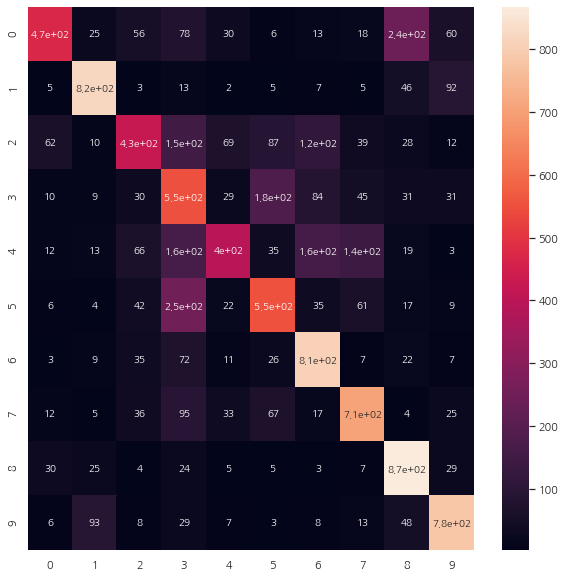

In [37]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)
#x축이 y_test, y축이 예측

#  SAVING THE MODEL

In [38]:
import os
# 현재 디렉토리를 받아 cwd(current working directory) 'saved_models'라는 이름의 폴더 생성
directory = os.path.join(os.getcwd(), 'saved_models')

#위에서 지정한 경로가 없다면
if not os.path.isdir(directory):
    #해당 디렉토리를 만들어라
    os.makedirs(directory)

#현재 디렉토리, 모델 이름 설정 확장자 h5
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)